If you are using the google colab please uncomment the following lines and run them

In [1]:
#!pip install pyvo

# Get the data by single query
* Activate TAP with anonymous user over the url:https://gaia.aip.de/tap
* add Authorization header to vo connection
 * you can find the the token on the menu entry at gaia.aip.de->username->API token
 * **NOTE**: *The anonymous query does not require authorisation token*
* query using the search service

<AxesSubplot:xlabel='bprp0', ylabel='mg0'>

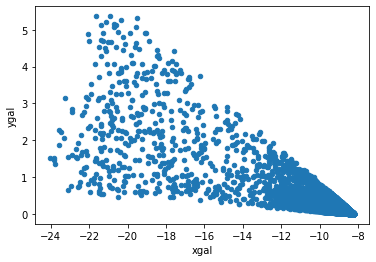

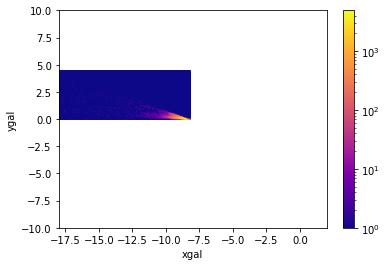

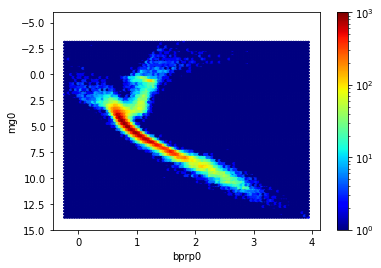

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pyvo as vo
#Activate TAP with anonymous user
service = vo.dal.TAPService("https://gaia.aip.de/tap")
# if you need to user your account provide the token
# NOTE: token you can find in the user preferenses at the gaia.aip.de web site.
# vo.utils.http.session.headers['Authorization'] = 'Your Token '

resultset = service.search("select top 100000 *  from gaiadr2_contrib.starhorse  where SH_OUTFLAG LIKE '00000' AND SH_GAIAFLAG LIKE '000' ")
df=resultset.to_table().to_pandas()
df.plot(x='xgal',y='ygal',kind='scatter')
fig, ax = plt.subplots()
sel=(np.abs(df.xgal+8.2)<10)&(np.abs(df.ygal)<10)
df[sel].plot(x='xgal',y='ygal',kind='hexbin', xlim=(-18,2),ylim=(-10,10), norm=mpl.colors.LogNorm(),cmap="plasma",ax=ax)
fig, ax = plt.subplots()
df[sel].plot(x='bprp0',y='mg0',kind='hexbin', ylim=(15,-6), norm=mpl.colors.LogNorm(),cmap="jet", ax=ax)